In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import math
import scipy.special as spec
import statistics as stats
from tqdm import tqdm

In [2]:
#define parameters
#the lattice has is of dimentions dim*a x dim*b
F_expected = 0.05316144
T = 10000000
a = 1             #primitive cell lenght
b = np.sqrt(3)/2  #primitive cell height
L = 10            #lenght of channel
dt = 10**(-1)
sc = 85
global pos

# One particle

In [3]:
pos = np.empty(T+1)

In [4]:
pos[0] = rand.uniform(0, 2*a)
pos[0]

0.9708889055445316

In [5]:
Fdc_plot = np.arange(0,0.1,0.002)
Fdc = np.repeat(Fdc_plot, T/len(Fdc_plot))
settle = T/len(Fdc_plot)     #the time left for the system to settle
settle

200000.0

In [6]:
settle/2

100000.0

100%|██████████████████████████████████████████████████████████████████| 10000000/10000000 [00:48<00:00, 205625.94it/s]


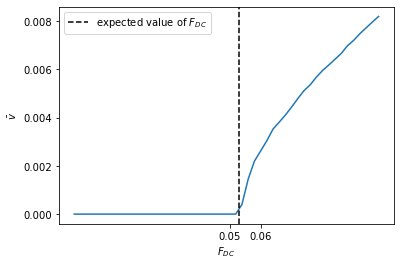

In [7]:
v = []
vm = []
vt = []
qn = [np.sqrt(1 + (2*np.pi/a)**2), np.sqrt(1 + (4*np.pi/a)**2)]
alpha = [1/(qn[0]*(1 + math.exp(-b*qn[0]))), 1/(qn[1]*(1 - math.exp(-b*qn[1]/2)))]
for t in tqdm(range(T)):
    force_x = sc*alpha[0] * math.sin(2*np.pi*pos[t]/a) * (math.exp(-qn[0]*b))  #force from potential
    force_x += Fdc[t]                                                          #driving force
    vt.append(force_x*dt)
    pos[t+1] = (pos[t]+  force_x*(dt**2)/2) % (2*a)
    if t % settle > settle/2:
        v.append(vt[t])
    if t % settle == settle - 1:
        vm.append(np.mean(v))
        v = []
fig, ax = plt.subplots()
ax.set_ylabel(r"$\bar v$")
ax.set_xlabel(r"$F_{DC}$")
ax.plot(Fdc_plot, vm)
ax.axvline(F_expected, linestyle='--', color='k', label = 'expected value of $F_{DC}$')
ax.set_xticks([round(F_expected, 2), 0.06], minor=False)
ax.legend()
plt.show()

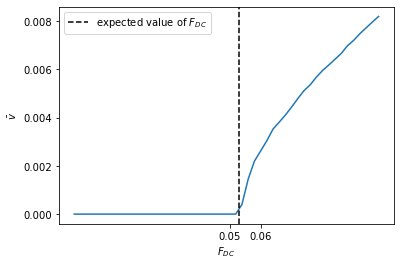

In [8]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$\bar v$")
ax.set_xlabel(r"$F_{DC}$")
ax.plot(Fdc_plot, vm)
ax.axvline(F_expected, linestyle='--', color='k', label = 'expected value of $F_{DC}$')
ax.set_xticks([round(F_expected, 2), 0.06], minor=False)
ax.legend()
plt.savefig('graph_one_vortex.png')

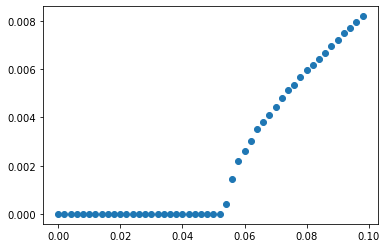

In [9]:
plt.scatter(Fdc_plot, vm)

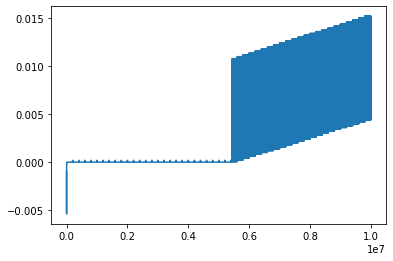

In [10]:
plt.plot(range(T), vt)
plt.show()

### The code bellow creates a gif of the particle in the channel

"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

from matplotlib import animation


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2*a), ylim=(0, 2*b))
scat = ax.scatter(pos[0], b, c='blue', s=100)

# initialization function: plot the background of each frame
def init():
    #print('init')
    #trans = np.transpose((pos[0],pos_y[0]))
    scat.set_offsets((pos[0],b))
    return scat,

# animation function.  This is called sequentially
def animate(i):
    #trans = np.transpose((pos[i],pos_y[0]))
    scat.set_offsets((pos[i],b))
    return scat,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=T, interval=25, blit = True)

anim.save('channel_vortex_one.gif')

# Chain

In [12]:
T = 100000

In [13]:
pos = np.empty((T+1,L))    
pos[0] = np.arange(0, L, a, dtype = float)
pos_y = np.repeat(b,len(pos[0]))

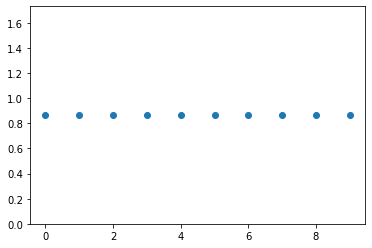

In [14]:
#initial setup plotted
fig, ax = plt.subplots()

plt.plot(pos[0], pos_y,'o')
#for i in range(len(img_x)):
#    plt.annotate(i, (img_x[i],img_y[i]))
plt.ylim(0, 2*b)
plt.show()

In [15]:
Fdc_plot = np.arange(0,0.1,0.005)
Fdc = np.repeat(Fdc_plot, T/len(Fdc_plot))
settle = T/len(Fdc_plot)     #the time left for the system to settle
settle

5000.0

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:45<00:00, 2202.27it/s]


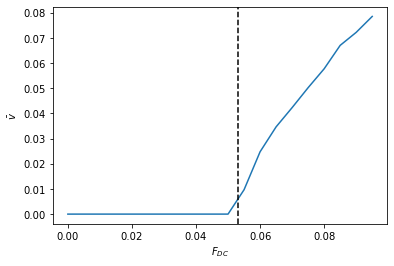

In [20]:
v_chain = []
inter_vortex = np.empty((T,L))
vm = []
vt = []
v = []
qn = np.sqrt(1 + (2*np.pi/a)**2)
alpha = 1/(qn*(1 + math.exp(-b*qn)))
for t in tqdm(range(T)):
    for i in range(int(L/a)):
        f = []      #list encoding magnitude of force
        d = []      #list encoding direction of force
        dx = pos[t] - pos[t][i]
        for j in range(int(L/a)):
            if j!=i:
                if abs(dx[j]) > L*a/2:
                    dx[j] = dx[j] - np.sign(dx[j])*L*a
                d.append(dx[j])                  #proportion of force in the x direction
                f.append(abs(dx[j]))             #magnitude of force
        
        force_x = sum(-np.sign(d)*spec.kn(1,f))#force from inter vortex interaction
        force_x += L * sc * alpha * (math.sin(2*np.pi*pos[t][i]/a)*math.exp(-qn*b)) #force from potential
        force_x += L * Fdc[t]                                                        #driving force
        inter_vortex[t][i] = force_x
        vt.append(force_x*dt)
        pos[t+1][i] = (pos[t][i] +  force_x*(dt**2)/2) % (L*a)
        
    v_chain.append(np.mean(vt))
    vt = []
    if t % settle > settle/2:
        v.append(v_chain[t])
    if t % settle == settle - 1:
        vm.append(np.mean(v))
        v = []
fig, ax = plt.subplots()
ax.set_ylabel(r"$\bar v$")
ax.set_xlabel(r"$F_{DC}$")
ax.plot(Fdc_plot, vm)
ax.axvline(F_expected, linestyle='--', color='k')
#plt.savefig('graph_chain.png')
plt.show()

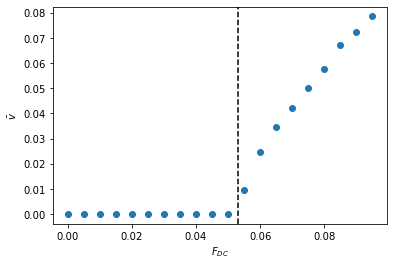

In [21]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$\bar v$")
ax.set_xlabel(r"$F_{DC}$")
ax.scatter(Fdc_plot, vm)
ax.axvline(F_expected, linestyle='--', color='k')
#plt.savefig('graph_chain_scatter_plot.png')
plt.show()

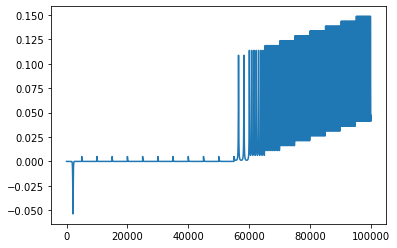

In [22]:
plt.plot(range(T), v_chain)
plt.show()

### The code bellow creates a gif of chain in the channel

"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

from matplotlib import animation


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, L*a), ylim=(0, 2*b))
scat = ax.scatter(pos[0], pos_y, c='blue', s=100)

# initialization function: plot the background of each frame
def init():
    #print('init')
    trans = np.transpose((pos[0],pos_y))
    scat.set_offsets(trans)
    return scat,

# animation function.  This is called sequentially
def animate(i):
    trans = np.transpose((pos[i],pos_y))
    scat.set_offsets(trans)
    return scat,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=T, interval=25, blit = True)

anim.save('channel_vortex.gif')